In [1]:
from IPython.display import display
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

import msreport

sys.path.append("..")
from python_scripts import ticplot

In [2]:
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.family"] = "Arial"

## Define parameters, load qtables

In [3]:
qtable_dir = "../qtable_data"
qtable_basenames = [
    "GFP-Atg8_acetylated",
    "GFP-Atg8_untreated",
]
output_dir = "../plots/figure_4"
treatments = ["GFP-Atg8_acetylated", "GFP-Atg8_untreated"]
colors = {
    "GFP-Atg8_untreated": "#808080",  # "#00CAC0",
    "GFP-Atg8_acetylated": "#E73C40",  # "#FD4C54",
}
light_colors = {
    "GFP-Atg8_untreated": "#B0B0B0",  # "#83e3da",
    "GFP-Atg8_acetylated": "#f18a8c", # "#fe9498",
}
treatment_labels = {
    "GFP-Atg8_untreated": "Mock treated",
    "GFP-Atg8_acetylated": "S-NHS-Ac treated",
}
experiment_titles = {
    "Ctrl": "Control samples",
    "Atg8": "GFP-Atg8 samples",
}

In [4]:
qtables = {}
for qtable_basename in qtable_basenames: 
    qtable = msreport.Qtable.load(qtable_dir, qtable_basename)
    qtables[qtable_basename] = qtable

## Plot figure

In [5]:
figname = "dist_plots_protein_cv_acetylated_vs_untreated.pdf"
figpath = os.path.join(output_dir, figname)


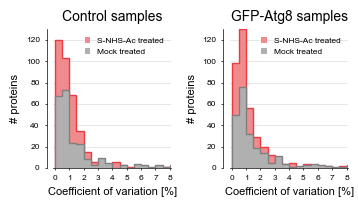

In [6]:
fig, axes = plt.subplots(1, 2, figsize=[3.8, 1.8])
for ax, experiment_tag in zip(axes, ["Ctrl", "Atg8"]):
    bins = np.linspace(0, 12, 25)

    for treatment in treatments:
        qtable = qtables[treatment]
        experiment = [e for e in qtable.get_experiments() if experiment_tag in e][0]
        expression_table = qtable.make_expression_table(samples_as_columns=True, exclude_invalid=True)
        samples = qtable.get_samples(experiment=experiment)
        cv = scipy.stats.variation(expression_table[samples], axis=1) * 100

        ax.hist(
            cv,
            bins=bins,
            cumulative=False,
            histtype="stepfilled",
            color=light_colors[treatment],
            label=treatment_labels[treatment],
            zorder=3,
        )
        ax.hist(
            cv,
            bins=bins,
            cumulative=False,
            histtype="step",
            color=colors[treatment],
            lw=1,
            zorder=3,
        )
    ax.legend(
        handlelength=0.7,
        fontsize=6,
        frameon=False
    )
        
    # Spines
    sns.despine(right=True, top=True, left=False, bottom=False)
    for spine in ax.spines.values():
        spine.set_color("#000000")
        spine.set_linewidth(0.5)
    ax.spines["left"].set_position(("outward", 5))
    ax.spines["bottom"].set_position(("outward", 0.4))

    # Set limits
    ax.set_xlim(-0.1, 8.1)

    # Adjust grind lines
    ax.yaxis.grid(
        which="both",
        linestyle="solid",
        # dashes=(4, 1.5),
        lw=0.5,
        alpha=1,
        color="#DDDDDD",
        zorder=0,
    )
    ax.xaxis.grid(False, which="both")

    # Tick and tick labels
    ax.tick_params(
        direction="out",
        length=1.5,
        width=0.5,
        colors="#000000",
        top=False,
        right=False,
        labelsize=6,
    )
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))

    ax.set_ylabel("# proteins", fontsize=8)
    ax.set_xlabel("Coefficient of variation [%]", fontsize=8)
    ax.set_title(experiment_titles[experiment_tag], fontsize=10)
    ax.set_ylim(0, 130)

fig.subplots_adjust(wspace=0.5)
fig.savefig(figpath, dpi=300)